# Time Series Forecasting 


## 1.Introduction

### Description


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### Data fields

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

Id - an Id that represents a (Store, Date) duple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [6]:
# Let's import some neccessary libraries

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(precision=4)
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = [10, 7]

In [8]:
# Let's read the dataset
data = pd.read_csv('train.csv')

# Show first 5 rows
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [11]:
# Check the type of each data in 'Date'
type(data.Date[1])

str

In [12]:
# This is a time series dataset so we need to convert 'Date' column to datetime64 type

data['Date']= pd.to_datetime(data['Date'], format='%Y-%m-%d')

In [13]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [16]:
# Use this 'Date' column as index

data = data.set_index('Date')

In [17]:
# Look again the dataset
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


## 2.Exploratory Data Analysis

In [19]:
# Show brief info of our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [21]:
#Check for null value
data.isnull().any()

Store            False
DayOfWeek        False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

In [22]:
# Get statical view of our dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


## 3.Preprocessing

In [33]:
#Sort data base on index
data.sort_index()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-01,1115,2,0,0,0,0,a,1
2013-01-01,379,2,0,0,0,0,a,1
2013-01-01,378,2,0,0,0,0,a,1
2013-01-01,377,2,0,0,0,0,a,1
2013-01-01,376,2,0,0,0,0,a,1
2013-01-01,375,2,0,0,0,0,a,1
2013-01-01,374,2,0,0,0,0,a,1
2013-01-01,373,2,0,0,0,0,a,1
2013-01-01,372,2,0,0,0,0,a,1


In [35]:
#Let's check the index if it has any repeated day
data.index.value_counts()

# the type of day is less than the total day in original dataset, so we should group our data.

2015-06-09    1115
2013-07-22    1115
2015-04-25    1115
2014-04-12    1115
2013-03-30    1115
2014-05-01    1115
2015-07-05    1115
2013-12-15    1115
2013-06-09    1115
2015-06-02    1115
2013-05-07    1115
2014-01-03    1115
2015-06-21    1115
2013-12-01    1115
2015-02-04    1115
2013-05-26    1115
2013-01-09    1115
2014-06-27    1115
2013-12-20    1115
2015-02-23    1115
2013-08-05    1115
2013-01-28    1115
2015-01-21    1115
2014-03-01    1115
2013-08-24    1115
2013-07-19    1115
2013-09-16    1115
2014-01-05    1115
2013-05-04    1115
2015-04-22    1115
              ... 
2014-09-15     935
2014-09-09     935
2014-11-11     935
2014-10-09     935
2014-12-24     935
2014-07-09     935
2014-08-14     935
2014-11-17     935
2014-09-16     935
2014-07-29     935
2014-11-09     935
2014-08-16     935
2014-08-28     935
2014-09-26     935
2014-11-24     935
2014-12-17     935
2014-12-25     935
2014-10-10     935
2014-09-05     935
2014-07-02     935
2014-10-12     935
2014-07-19  

In [36]:
# Group our data with "pd.Grouper(freq='M')" and sum it
#save result in data_s
data_s =data.groupby(pd.Grouper(freq='M')).sum()

In [37]:
# Let's check the look
data_s.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Date,,,,,,,
2013-01-31,19286282,134913,180132207,20380423,28869,11150,5115
2013-02-28,17420760,124880,171534275,19244468,26683,11150,2676
2013-03-31,19287270,144950,201180369,21969462,27892,16725,5689
2013-04-30,18665100,128225,183431432,20882365,27880,13380,5319
2013-05-31,19287270,138260,185411063,20723886,26202,14495,3774


In [40]:
data_s.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Date,,,,,,,
2013-01-31,19286282,134913,180132207,20380423,28869,11150,5115
2013-02-28,17420760,124880,171534275,19244468,26683,11150,2676
2013-03-31,19287270,144950,201180369,21969462,27892,16725,5689
2013-04-30,18665100,128225,183431432,20882365,27880,13380,5319
2013-05-31,19287270,138260,185411063,20723886,26202,14495,3774


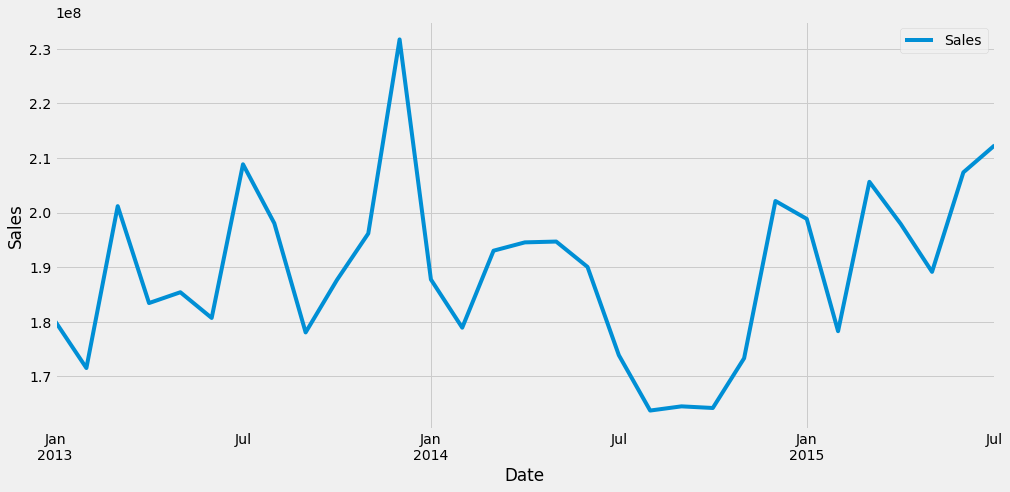

In [51]:
#Let's plot the 'Sales' column
plt.figure(figsize=(15,7))
s = data_s['Sales']

s.plot(label='Sales')
plt.ylabel('Sales')
plt.legend()



## Objective: Predict total sales per month for the entire company.

In [52]:
# Take a look at data_s
data_s

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Date,,,,,,,
2013-01-31,19286282,134913,180132207,20380423,28869,11150,5115
2013-02-28,17420760,124880,171534275,19244468,26683,11150,2676
2013-03-31,19287270,144950,201180369,21969462,27892,16725,5689
2013-04-30,18665100,128225,183431432,20882365,27880,13380,5319
2013-05-31,19287270,138260,185411063,20723886,26202,14495,3774
2013-06-30,18665100,139375,180702351,20473046,27942,11150,1551
2013-07-31,19287270,131570,208843882,22872045,30166,14495,14723
2013-08-31,19287270,141605,198042727,22314232,30025,13380,17705
2013-09-30,18665100,133800,178053963,20350031,27981,11150,2497


***Sales*** is the column we gonna predict using date

In [53]:
# Using pd.series.rolling to calculate mean and std for 'Sales' series with window=12
roll = data_s['Sales'].rolling(12)

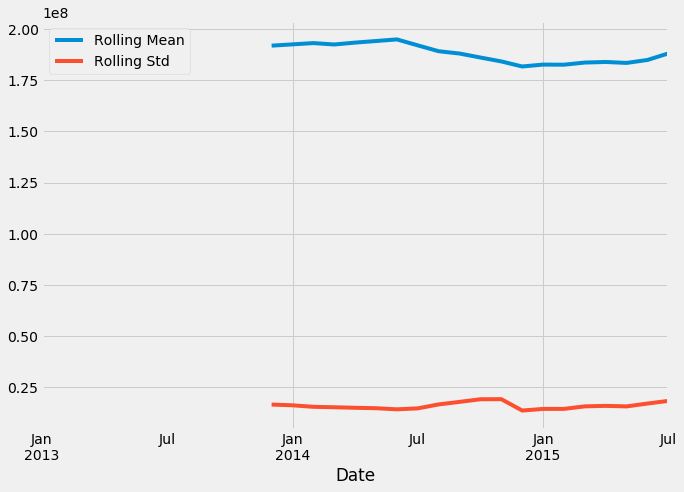

In [54]:
# Plot mean and std values
roll.mean().plot(label='Rolling Mean')
roll.std().plot(label='Rolling Std')
plt.legend()

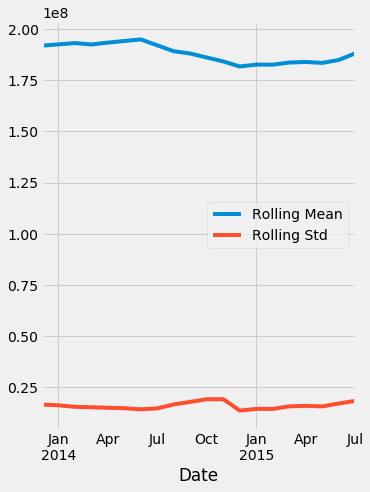

In [64]:
# Let's drop the null value of roll and plot again
plt.figure(figsize=(5,7))
roll.mean().dropna().plot(label='Rolling Mean')
roll.std().dropna().plot(label='Rolling Std')
plt.legend()

Quick observations: It's witnessed a slight decreasing "Trend"

Let's check that with a quick decomposition into Trens, Seasonality and Residuals

## Decomposing Time Series

We can also visualize our data using a method called times_series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise

### Additive model

$Y_t=S_t+T_t+E_t$

Where: 
- $Y_t$ is the data at period t
- $S_t$ is the seasonal component at period t
- $T_t$ is the trend-cycle component at period t
- $E_t$ is the remainder


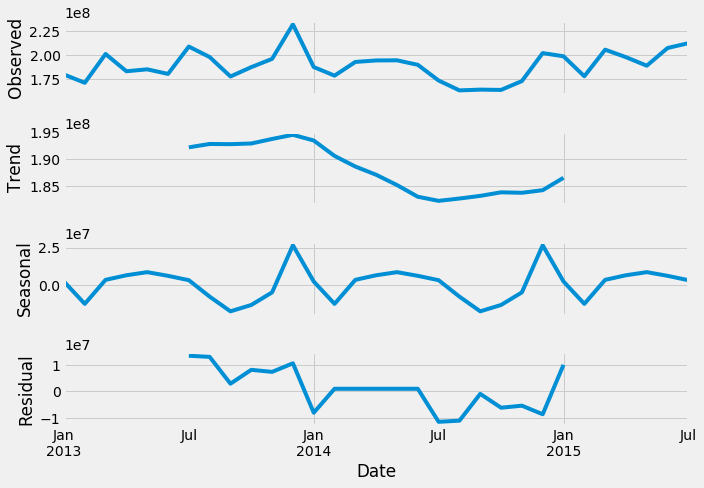

In [65]:
# Import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

#decompose 'Sales' with freq=12, model='additive'
res= seasonal_decompose(s, freq=12, model='additive')
fig=res.plot();

### Stationarity tests

Most statistical forecasting methods are designed to work on a stationary time series. The first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary.
There are multiple tests that can be used to check stationarity.
- ADF( Augmented Dicky Fuller Test)
- KPSS
- PP (Phillips-Perron test)

Let's just perform the ADF which is the most commonly used one.

In [67]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test: ')
    datatest = adfuller(timeseries, autolag='AIC')
    dataoutput = pd.Series(datatest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in datatest[4].items():
        dataoutput['Critical Value (%s)'%key]=value
        print(dataoutput)

In [68]:
#Let's test with original timeseries
test_stationarity(s)

Results of Dickey-Fuller Test: 
Test Statistic                 -3.544365
p-value                         0.006918
#Lags Used                      0.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
dtype: float64
Test Statistic                 -3.544365
p-value                         0.006918
#Lags Used                      0.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
dtype: float64
Test Statistic                 -3.544365
p-value                         0.006918
#Lags Used                      0.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


- Explanation: ***What is the value of p-value ?
    If it's greater than 0.05, we cannot reject that time series is not stationary
- With the p-value = 0.006 -> This timeseries is stationary   

## 4.Modelling

### ARIMA(p, d, q): a powerfull statistical mode for forecasting timeseries. We need to choose hyperparameter for ARIMA. ACF and PACF are the tools we need.

A nifty summary of the above plots:

ACF Shape	| Indicated Model |
-- | -- |
Exponential, decaying to zero |	Autoregressive model. Use the partial autocorrelation plot to identify the order of the autoregressive model |
Alternating positive and negative, decaying to zero	Autoregressive model. |  Use the partial autocorrelation plot to help identify the order. |
One or more spikes, rest are essentially zero | Moving average model, order identified by where plot becomes zero. |
Decay, starting after a few lags |	Mixed autoregressive and moving average (ARMA) model. | 
All zero or close to zero | Data are essentially random. |
High values at fixed intervals | Include seasonal autoregressive term. |
No decay to zero |	Series is not stationary |

In [70]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [71]:
# Let's diff series with period is 12 for futher steps. Save results in 'data_diff' variable
data_diff = s.diff(periods=12)

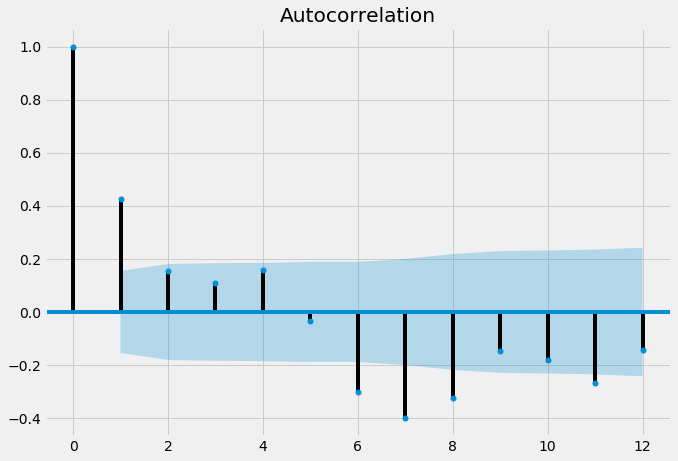

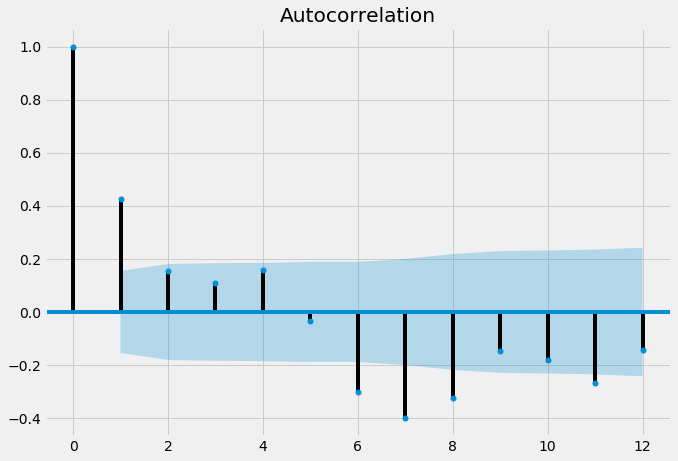

In [75]:
# Plot autocorrelation of 'data_diff' with lags=12, alpha=0.5
plot_acf(data_diff.dropna(), lags=12, alpha=0.5)

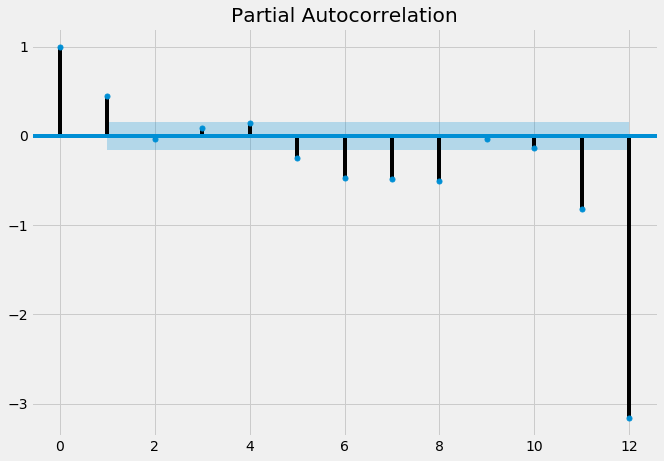

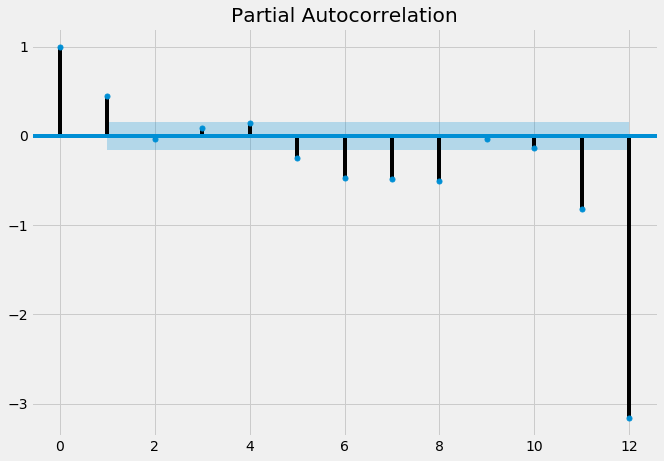

In [76]:
# Plot Partial Autocorrelation of 'data_diff' with lags=12, alpha=0.5 
plot_pacf(data_diff.dropna(), lags=12, alpha=0.5)

In [82]:
from statsmodels.tsa.arima_model import ARMA

best_aic = np.inf
best_order = None
best_model = None

rng = range(5)
for i in rng:
    for j in rng:
        if i == j == 0:
            continue
        try:
            # Create and train ARMA model with order=(i, j)
            model = ARMA(data_diff.dropna(), order=(i,j)).fit()
            aic = model.aic
            if aic < best_aic:
                best_aic = aic
                best_order = (i, j)
                best_model = model
        except: continue
print('AIC: {:6.5} | order: {}'.format(best_aic, best_order))

AIC: 692.23 | order: (1, 0)


Therefore, with this model, we can get the best i, j for order
    -i=1
    -j=0

## 5.Summary

In [83]:
# Using the best model to make prediction with start=0, end =25
predict = ARMA(data_diff.dropna(), order=(0,1)).fit().predict(start=0, end=25)

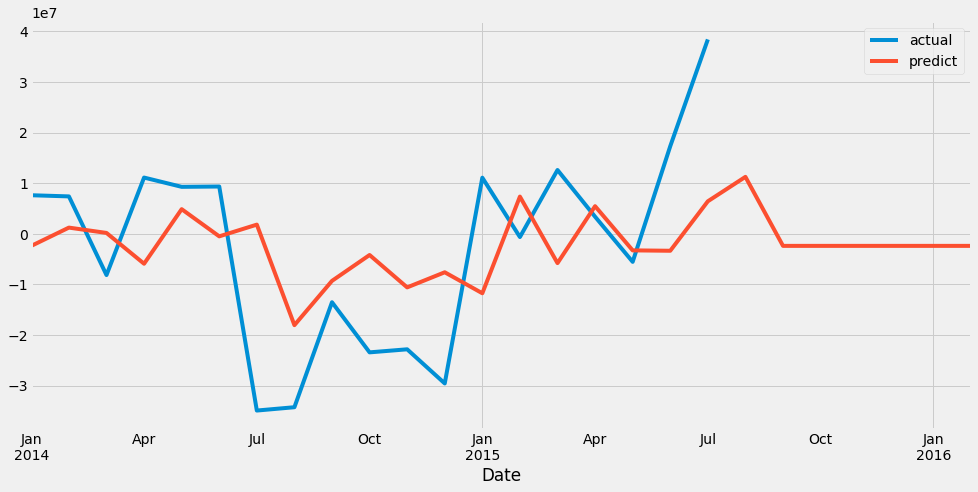

In [86]:
plt.figure(figsize=(15,7))
data_diff.dropna().plot(label='actual')
predict.plot(label='predict')
plt.legend()